# Projekt: Eliminacja braków danych i ich wpływ na modele uczenia maszynowego

Natalia Łyś `412728`<br>
Zuzanna Deszcz `413481`

### Opis zadania
Na platformie znajdują się przykładowe zestawy danych zawierające pewne braki (`zad3_Airline.csv` i `zad3_Stroke`). Dla każdego z nich:

1. Zastosować różne sposoby eliminacji braków danych (dodatkowo opisać krótko każdy z nich). Porównać statystyki zmiennych przed eliminacją braków danych i po ich eliminacji (po zastosowaniu różnych sposobów). Co można powiedzieć o rozkładach tych zmiennych? Czy uległy zmianie?

2. Ocenić wpływ różnych sposobów eliminacji braków danych na wyniki uzyskiwane po zastosowaniu prostych technik uczenia maszynowego (można wybrać jedną z dotychczas omawianych). Czy sposób eliminacji braków danych wpływa na uzyskiwane wyniki?

In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# wczytywanie danych
data_airline = pd.read_csv('zad3_Airline.csv', sep=';')
data_stroke = pd.read_csv('zad3_Stroke.csv', sep=';')
# Wyświetlenie pierwszej tabeli
display(data_airline.head().style.format({'Satisfaction': "{:.0f}"}).set_caption("Pierwsze 5 wierszy danych linii lotniczych"))

# Wyświetlenie drugiej tabeli
display(data_stroke.head().style.format({'Age': "{:.0f}"}).set_caption("Pierwsze 5 wierszy danych dotyczących udarów"))

,satisfaction,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Seat.comfort,Departure.Arrival.time.convenient,Food.and.drink,Gate.location,Inflight.wifi.service,Inflight.entertainment,Online.support,Ease.of.Online.booking,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Cleanliness,Online.boarding,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes
0,satisfied,Female,Loyal Customer,20.000000,Personal Travel,Eco,3009,0,1,0,3.000000,4,0,3,4,1,2,3,1,4,4,0,0.000000
1,satisfied,Female,Loyal Customer,48.000000,Personal Travel,Eco,1449,0,1,0,3.000000,3,3,2,2,2,1,2,4,2,2,0,2.000000
2,satisfied,Male,nan,nan,Personal Travel,Eco,2840,0,1,0,3.000000,4,0,4,4,2,4,2,4,3,4,0,0.000000
3,satisfied,Male,Loyal Customer,13.000000,Personal Travel,Eco,2306,0,1,0,3.000000,4,0,3,4,4,2,3,2,2,4,0,0.000000
4,satisfied,Male,Loyal Customer,34.000000,Personal Travel,Eco,1952,0,1,0,3.000000,2,0,2,2,3,4,4,4,4,2,10,0.000000


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1.000000,Yes,Private,Urban,"228,69","36,6",formerly smoked,1
1,Male,80,0,1.000000,Yes,Private,Rural,"105,92","32,5",never smoked,1
2,Female,49,0,0.000000,Yes,Private,Urban,"171,23","34,4",smokes,1
3,Female,79,1,nan,Yes,Self-employed,Rural,"174,12",24,never smoked,1
4,Male,81,0,0.000000,Yes,Private,Urban,"186,21",29,formerly smoked,1


Analiza braków danych dla 'Airline'
Braki danych w zestawie:
satisfaction                           0
Gender                                 0
Customer.Type                        500
Age                                  212
Type.of.Travel                         0
Class                                  0
Flight.Distance                        0
Seat.comfort                           0
Departure.Arrival.time.convenient      0
Food.and.drink                         0
Gate.location                        132
Inflight.wifi.service                  0
Inflight.entertainment                 0
Online.support                         0
Ease.of.Online.booking                 0
On.board.service                       0
Leg.room.service                       0
Baggage.handling                       0
Checkin.service                        0
Cleanliness                            0
Online.boarding                        0
Departure.Delay.in.Minutes             0
Arrival.Delay.in.Minutes             

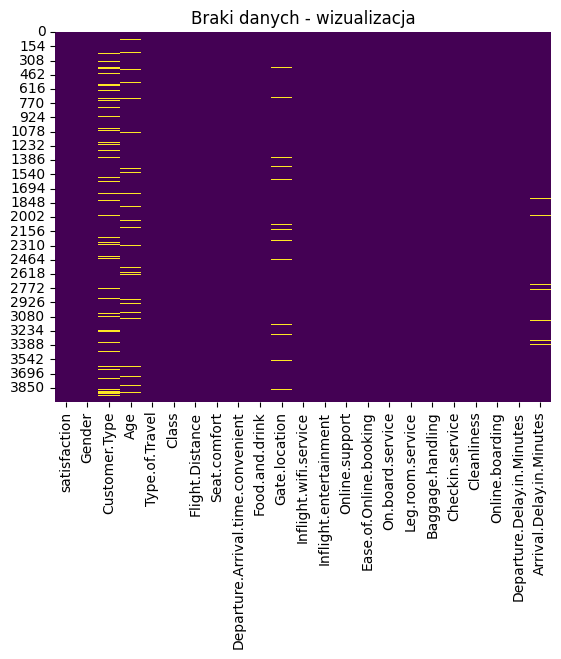

Analiza braków danych dla 'Stroke'
Braki danych w zestawie:
gender                0
age                   0
hypertension          0
heart_disease        24
ever_married          0
work_type            47
Residence_type        0
avg_glucose_level    41
bmi                  37
smoking_status        0
stroke                0
dtype: int64
Procent braków danych:
gender                0.00
age                   0.00
hypertension          0.00
heart_disease         6.00
ever_married          0.00
work_type            11.75
Residence_type        0.00
avg_glucose_level    10.25
bmi                   9.25
smoking_status        0.00
stroke                0.00
dtype: float64


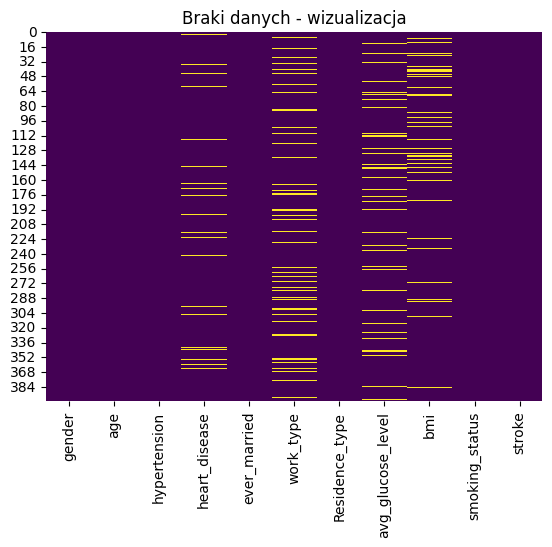

In [26]:
def missing_data_analysis(df):
    print("Braki danych w zestawie:")
    print(df.isnull().sum())
    print("Procent braków danych:")
    print((df.isnull().sum() / len(df)) * 100)
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title("Braki danych - wizualizacja")
    plt.show()

print("Analiza braków danych dla 'Airline'")
missing_data_analysis(data_airline)

print("Analiza braków danych dla 'Stroke'")
missing_data_analysis(data_stroke)


### Dane linii lotniczych 

Braki w danych linii lotniczych widzimy w zmiennych *Customer.Type*, *Age*, *Gate.location* i *Arrival.Delay.in.Minutes*. Z czego dane o typie klienta i lokalizacja bramki to zmienne kategoryczne


### Dane o udarach 

Braki danych są w zmiennych: *heart_disease*, *work_type*, *avg_glucose_level*,*bmi*. Z czego informacja o występowaniu choroby serca i typu podejmowanej pracy to zmienne kategoryczne.


 ### 1. Zastosować różne sposoby eliminacji braków danych (dodatkowo opisać krótko każdy z nich).  Porównać statystyki zmiennych przed eliminacją braków danych i po ich eliminacji (po zastosowaniu różnych sposobów). Co można powiedzieć o rozkładach tych zmiennych? Czy uległy zmianie?


In [27]:
methods = {
    'Drop Missing': lambda df: df.dropna(),
    'Fill with Mean': lambda df: df.fillna(df.mean()),
    'Fill with Median': lambda df: df.fillna(df.median()),
    'Fill with Mode': lambda df: df.fillna(df.mode().iloc[0])
}

def compare_statistics(df, method_name):
    print(f"\nStatystyki dla metody: {method_name}")
    print(df.describe())

print("\nEliminacja braków danych dla 'Airline'")
for method_name, method in methods.items():
    data_airline_method = method(data_airline)
    compare_statistics(data_airline_method, method_name)

print("\nEliminacja braków danych dla 'Stroke'")
for method_name, method in methods.items():
    data_stroke_method = method(data_stroke)
    compare_statistics(data_stroke_method, method_name)



Eliminacja braków danych dla 'Airline'

Statystyki dla metody: Drop Missing
               Age  Flight.Distance  Seat.comfort  \
count  3121.000000      3121.000000   3121.000000   
mean     39.363025      1962.230054      2.760333   
std      15.145488      1047.531346      1.364468   
min       7.000000        50.000000      0.000000   
25%      27.000000      1324.000000      2.000000   
50%      39.000000      1902.000000      3.000000   
75%      51.000000      2512.000000      4.000000   
max      85.000000      6828.000000      5.000000   

       Departure.Arrival.time.convenient  Food.and.drink  Gate.location  \
count                        3121.000000     3121.000000    3121.000000   
mean                            2.997116        2.842358       2.984941   
std                             1.530562        1.442536       1.302155   
min                             0.000000        0.000000       1.000000   
25%                             2.000000        2.000000       2.00000

TypeError: can only concatenate str (not "int") to str

### 2. Ocenić wpływ różnych sposobów eliminacji braków danych na wyniki uzyskiwane po zastosowaniu prostych technik uczenia maszynowego (można wybrać jedną z dotychczas omawianych). Czy sposób eliminacji braków danych wpływa na uzyskiwane wyniki?